## Lending Club Case Study
### Submitted by 1. Shambhu Kumar Gupta  2. Rakesh Kumar
### Grpup Facilitator: Shambhu Kumar Gupta (kg.shambhu@gmail.com)

-----------------------------------------------------------

### **Business Objective**: 
The Consumer Finance company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

### **Solution Approach**:

In order to identify the factors influencing loan default, we need to carry out the following activities:

1. Importing the data and general Statistics
2. Data Cleaning (Null Values, Imputation, Data Format, Data pruning)
3. Data Analysis (Univariate and Bi-variate Analysis to identify factors)
4. Recommendations ( This will presented in a seperate PPT)

-----------------------------------------------------------

### 1. Importing the data and general Statistics

In [1]:
# Loading loan.csv file into df
import pandas as pd

path = "C:/Users/I336615/Desktop/OpSG/AIML/Program/C2 - Stats & EDA/Lending Club Case Study/" # making it constant so that
# we dont have to change it all the place.

# DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
loan = pd.read_csv(path+"loan.csv", low_memory=False) # memory parameter used to remove above warning
loan.head() # Sample data display

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [2]:
# Displaying some baic statistics like shape, info, describe
print("Shape of loan df is: ", loan.shape)
print("Size of loan df is: ", loan.size)
print(loan.info())

Shape of loan df is:  (39717, 111)
Size of loan df is:  4408587
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [3]:
# # Look at the missing values now across all columns

print("Displaying the % missing values")
print(round(100*(loan.isnull().sum()/len(loan.index))),2)

Displaying the % missing values
id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti     

-----------------------------------------------------------

### 2. Data Cleaning (Null Values, Imputation, Data Format, Data pruning)

In [4]:
# As observed in part 1, there are many columns which has all the values as null (100%). We can drop these columns
# Getting the list of columns where more than 90% value in a column is null

col_drop = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]
print(col_drop)
print("Total No. of columns with more than 90% null values: ", col_drop.shape)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [5]:
# Drop these 56 columns now which has more than 90% values as Null
loan = loan.drop(col_drop, axis = 1)
print(loan.shape)
print("Displaying the % missing values again")
print(round(100*(loan.isnull().sum()/len(loan.index))),2)

(39717, 55)
Displaying the % missing values again
id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_l

In [6]:
# Two column still showing 33% and 65% missing value
# See some sample data to make a decision
print(loan['desc'].head(5))
print(loan['mths_since_last_delinq'].head(5))

# desc (33% missing) - This is some text and can be ignored. We have the purpose of the loan in another column
# mths_since_last_delinq(95%) - This will not be avaible for new loan application so this column can be dropped

loan = loan.drop(['desc','mths_since_last_delinq'],axis = 1)
print("Final shape of df loan is: ", loan.shape)

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
Name: desc, dtype: object
0     NaN
1     NaN
2     NaN
3    35.0
4    38.0
Name: mths_since_last_delinq, dtype: float64
Final shape of df loan is:  (39717, 53)


In [7]:
# See the distribution of null values row wise. We have 53 columns and we can drop a row is more than 30 columns doesn't 
# have any values
print(loan.isnull().sum(axis = 1))

# It seems there are not many null values per row. See if we have more than 10% of null values in each row

print("Number of Rows having > 20 Null values: ",len(loan[loan.isnull().sum(axis=1) > 20]))

# As there is no rows with more than 20 null values, no treatment is required rows wise.


0        1
1        0
2        1
3        0
4        0
5        0
6        0
7        0
8        1
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       1
27       0
28       0
29       0
        ..
39687    4
39688    4
39689    4
39690    4
39691    4
39692    4
39693    4
39694    4
39695    4
39696    4
39697    4
39698    4
39699    4
39700    5
39701    4
39702    4
39703    4
39704    5
39705    4
39706    5
39707    4
39708    4
39709    4
39710    4
39711    4
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64
Number of Rows having > 20 Null values:  0


In [8]:
""" There are certain attributes which is relevant only for a processed loan. As we are trying to predict attributes that
helps to decide whether a loan will be defaulted or not, we can drop this attributes. """

# Loan attributes applicable only for processed loan

loan_attributes = ["delinq_2yrs", "earliest_cr_line","inq_last_6mths", "open_acc", "pub_rec", "revol_bal", "revol_util",
                    "total_acc", "out_prncp", "out_prncp_inv", "total_pymnt","total_pymnt_inv","total_rec_prncp",
                   "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d",
                  "last_pymnt_amnt", "last_credit_pull_d"]

#  Adding few more columns to the list to be dropped as they do not add value in analysis
""" "member_id" - same as id so can be removed
"url" - not useful, can be dropped
"funded_amnt","funded_amnt_inv", - same as amount column
"pymnt_plan", "application_type", "initial_list_status" - only one value for all rows so no analysis possible
"zip_code" - no use, we can use address_state for analysis
"title" - doesn't seems to add any information """
            
more_col = ["member_id","url" ,"funded_amnt","funded_amnt_inv","pymnt_plan","zip_code","title","initial_list_status", 
             "application_type"]

loan_attributes = loan_attributes + more_col
print("Further Columns to be dropped is: ", len(loan_attributes))


Further Columns to be dropped is:  29


In [9]:
# Drop the above mentioned 29 columns

loan = loan.drop(loan_attributes,axis =1)
print("Final loan df shape: ", loan.shape)

Final loan df shape:  (39717, 24)


In [10]:
# Let's have a look at the column type now too see if we need toi change the datatype for some columns
print(loan.info())

""" Observation: The follwoing columns needs some treatement
int_rate - should be float
emp_length - should be int/flaot
issue_d   - should be type date  
loan_status - should be categorical/int         """


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 24 columns):
id                            39717 non-null int64
loan_amnt                     39717 non-null int64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
purpose                       39717 non-null object
addr_state                    39717 non-null object
dti                           39717 non-null float64
collec

' Observation: The follwoing columns needs some treatement\nint_rate - should be float\nemp_length - should be int/flaot\nissue_d   - should be type date  \nloan_status - should be categorical/int         '

In [11]:
# changing the col to date type
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
# Extracting month and year from the loan date and storing ointo diff col
loan['issue_m'] = loan['issue_d'].dt.month
loan['issue_y'] = loan['issue_d'].dt.year
print(loan.shape)
# colum term is an important column and it's data type is object. Letsa store the numeric value only
loan.term = loan.term.apply(lambda x : x.split()[0])
print(loan.head(5))

(39717, 26)
        id  loan_amnt term int_rate  installment grade sub_grade  \
0  1077501       5000   36   10.65%       162.87     B        B2   
1  1077430       2500   60   15.27%        59.83     C        C4   
2  1077175       2400   36   15.96%        84.33     C        C5   
3  1076863      10000   36   13.49%       339.31     C        C1   
4  1075358       3000   60   12.69%        67.79     B        B5   

                  emp_title emp_length home_ownership  ...    dti  \
0                       NaN  10+ years           RENT  ...  27.65   
1                     Ryder   < 1 year           RENT  ...   1.00   
2                       NaN  10+ years           RENT  ...   8.72   
3       AIR RESOURCES BOARD  10+ years           RENT  ...  20.00   
4  University Medical Group     1 year           RENT  ...  17.94   

  collections_12_mths_ex_med policy_code acc_now_delinq  \
0                        0.0           1              0   
1                        0.0           1      

In [12]:
# Dealing with interest type - Convert them in floating
loan['int_rate'] = loan['int_rate'].str.strip('%').astype('float')
loan['int_rate'].describe

<bound method NDFrame.describe of 0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
5         7.90
6        15.96
7        18.64
8        21.28
9        12.69
10       14.65
11       12.69
12       13.49
13        9.91
14       10.65
15       16.29
16       15.27
17        6.03
18       11.71
19        6.03
20       15.27
21       12.42
22       11.71
23       11.71
24       11.71
25        9.91
26       14.27
27       16.77
28       11.71
29       11.71
         ...  
39687    12.49
39688    13.43
39689    11.54
39690    10.59
39691    15.96
39692     9.01
39693     9.96
39694     7.43
39695     7.43
39696    10.59
39697    10.28
39698     9.01
39699     8.38
39700     7.75
39701     8.38
39702    11.22
39703    10.28
39704     8.70
39705     7.43
39706     8.07
39707     9.33
39708     9.96
39709    11.22
39710     7.43
39711     8.70
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64>

In [13]:
# Dealing with Employee length - Intend to keep the numeric value only
print(loan.emp_length.unique())

# We will change these values and store only the numeric value there
emp_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}
emp_dict

loan = loan.replace({'emp_length': emp_dict })
print(loan.emp_length.unique())


['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
[10.  0.  1.  3.  8.  9.  4.  5.  6.  2.  7. nan]


In [14]:
# The main column for our analysis is loan_status. Let's see their data and data type for further cleaning
# Checking no. of column, Records, and loan status
print(loan.shape)
loan.loan_status.value_counts()


(39717, 26)


Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [15]:
# There are 1140 rows in the file with status "Current". These are neighter fully paid nor default loan and hence out of our 
# analysis. We will remove these 1140 columns

loan = loan[(loan['loan_status'] != 'Current')]
print(loan.shape)
loan.loan_status.value_counts()

(38577, 26)


Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [16]:
# We faced issue while plotting the graph. Error: unsupported operand type(s) for /: 'str' and 'int'
# So, need to change loan_sttaus to category varibale

loan['loan_status'] = loan['loan_status'].astype('category')
print(loan.loan_status.head(5))
print(loan.loan_status.value_counts())

# Store the value as 0 and 1 and store the result as integer [default loan = 1]
loan['loan_status'] = loan['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)
loan['loan_status'] = loan['loan_status'].apply(lambda x: pd.to_numeric(x))
print(loan.loan_status.value_counts())


0     Fully Paid
1    Charged Off
2     Fully Paid
3     Fully Paid
5     Fully Paid
Name: loan_status, dtype: category
Categories (2, object): [Charged Off, Fully Paid]
Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64
0    32950
1     5627
Name: loan_status, dtype: int64


In [19]:
# Lets have a final look at the data type of all columns
loan.info()

# By large, the data looks clean now. We can save this as final df

loan.to_csv(path+"loan_clean.csv", index=False)  # String the file

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 26 columns):
id                            38577 non-null int64
loan_amnt                     38577 non-null int64
term                          38577 non-null object
int_rate                      38577 non-null float64
installment                   38577 non-null float64
grade                         38577 non-null object
sub_grade                     38577 non-null object
emp_title                     36191 non-null object
emp_length                    37544 non-null float64
home_ownership                38577 non-null object
annual_inc                    38577 non-null float64
verification_status           38577 non-null object
issue_d                       38577 non-null datetime64[ns]
loan_status                   38577 non-null category
purpose                       38577 non-null object
addr_state                    38577 non-null object
dti                           38577 non-null fl

-----------------------------------------------------------

### 3. Data Analysis (Univariate and Bi-variate Analysis to identify factors)

In [20]:
# Checking the %age of default loan
L0 = loan['loan_status'][(loan['loan_status'] == 1)].count()
L1 =loan['loan_status'].count()

print(" % Charged Off Loan: ", round(100*(L0/L1),2))

 % Charged Off Loan:  14.59


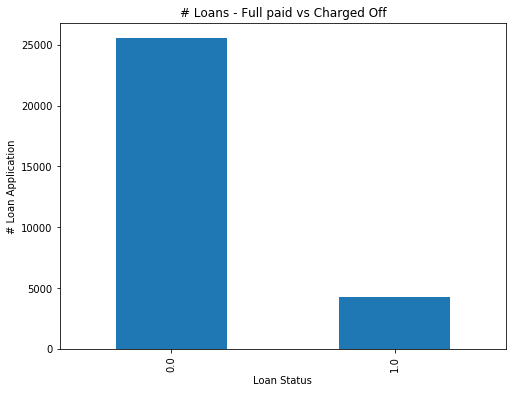

In [50]:
# Our Aim is to identify variable that incceases the default loan percent
# Plot the percentage of Full paid vs Charged Off
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
loan.groupby('loan_status').id.count().plot.bar()
plt.title('# Loans - Full paid vs Charged Off')
plt.xlabel("Loan Status")
plt.ylabel("# Loan Application")
plt.show()

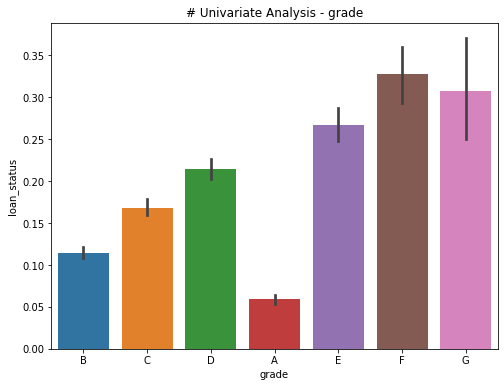

In [51]:
# plotting default loan against grade

plt.figure(figsize=(8,6))
plt.title('# Univariate Analysis - grade')
sns.barplot(x = 'grade', y ='loan_status', data=loan)
plt.show()

# Inference: As the grade incrases from A to G, the loan default rate increases

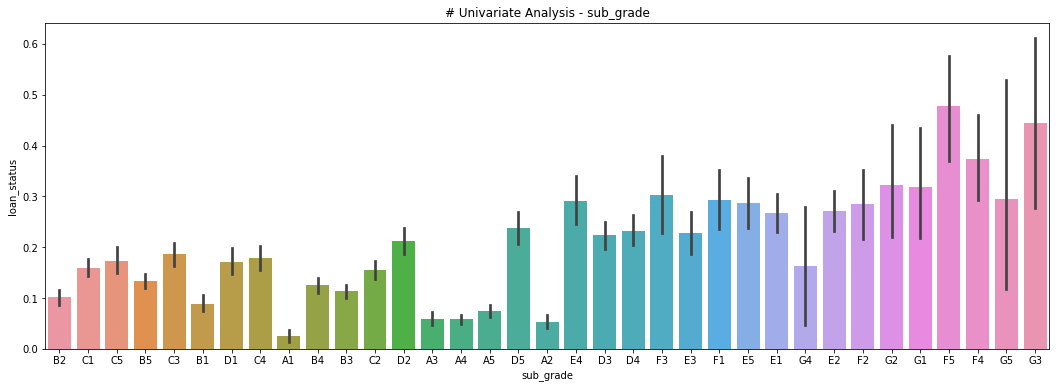

In [53]:
# plotting default loan against sub_grade

plt.figure(figsize=(18,6))
plt.title('# Univariate Analysis - sub_grade')
sns.barplot(x = 'sub_grade', y ='loan_status', data=loan)
plt.show()

# Inference: As the sub_grade incrases from A1 to A4 (and likewise ex: G1 to G5), the loan default rate increases

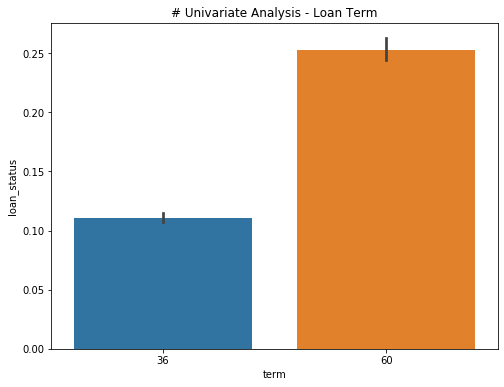

In [24]:
# plotting default loan against Loan term
loan['loan_status'] = loan['loan_status'].astype('float')
plt.figure(figsize=(8,6))
plt.title('# Univariate Analysis - Loan Term')
sns.barplot(x = 'term', y ='loan_status', data=loan)
plt.show()

# Inference: 60 month loan term is more likely to default


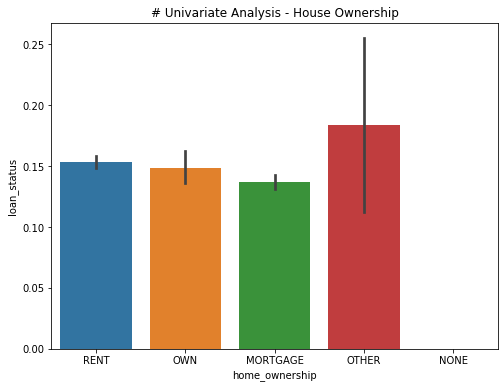

In [25]:
# plotting default loan against Home ownership
plt.figure(figsize=(8,6))
plt.title('# Univariate Analysis - House Ownership')
sns.barplot(x = 'home_ownership', y ='loan_status', data=loan)
plt.show()

# Inference: doesn't seems to haver an impact as bar height is almost similar for Rent and Own category

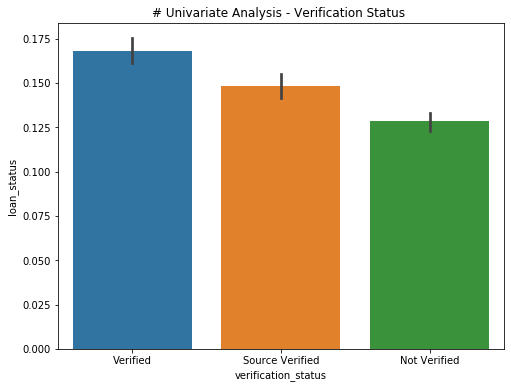

In [26]:
# plotting default loan against Verification Status
plt.figure(figsize=(8,6))
plt.title('# Univariate Analysis - Verification Status ')
sns.barplot(x = 'verification_status', y ='loan_status', data=loan)
plt.show()

# Inference: Verfied loans are slightly more likely to deafult.

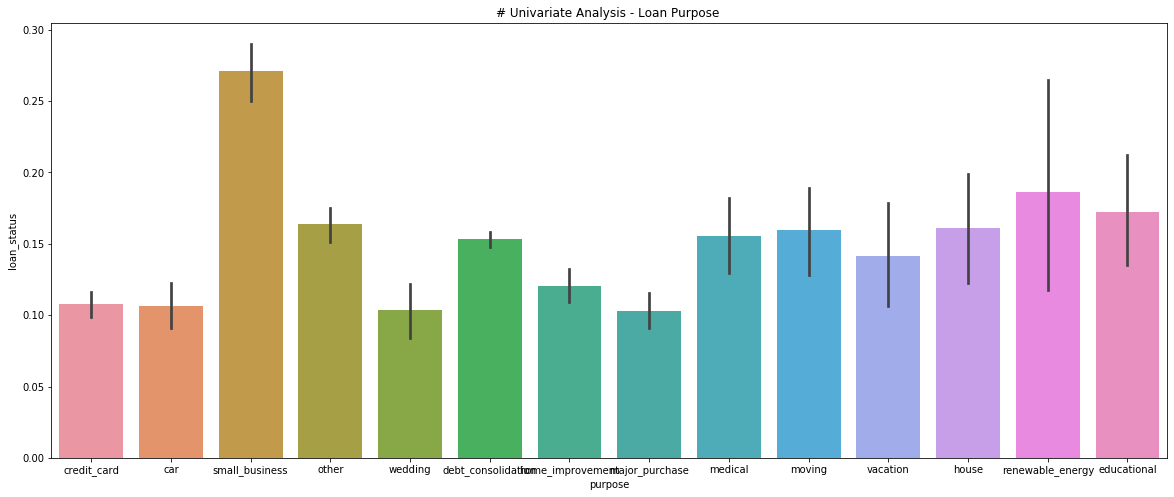

In [27]:
# plotting default loan against Loan Purpose
plt.figure(figsize=(20,8))
plt.title('# Univariate Analysis - Loan Purpose ')
sns.barplot(x = 'purpose', y ='loan_status', data=loan)
plt.show()

# Inference: Loan taken for Small business is more likely to default 

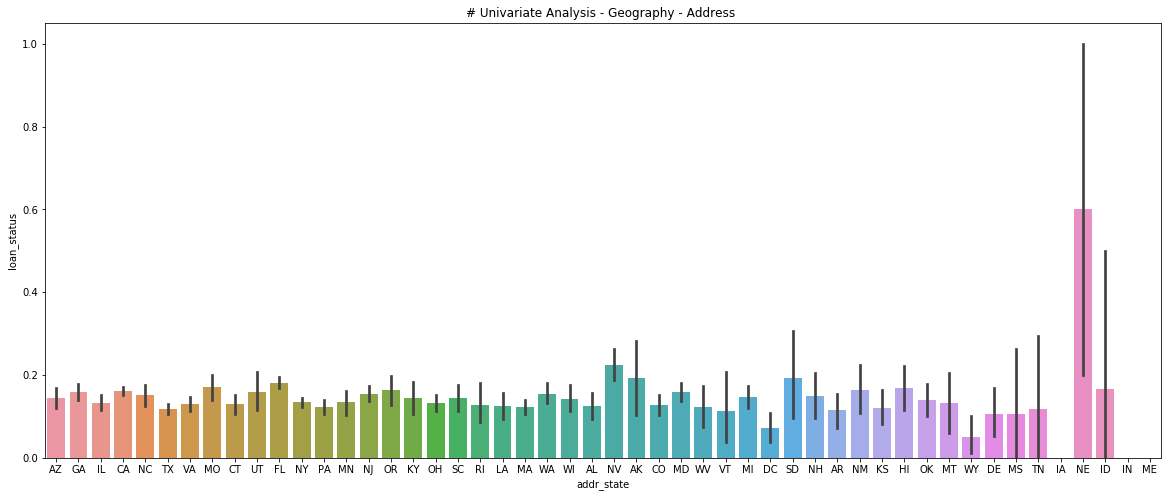

In [28]:
# plotting default loan against Geography
plt.figure(figsize=(20,8))
plt.title('# Univariate Analysis - Geography - Address ')
sns.barplot(x = 'addr_state', y ='loan_status', data=loan)
plt.show()

# Inference: People from NE defaults the most compared to other states people.

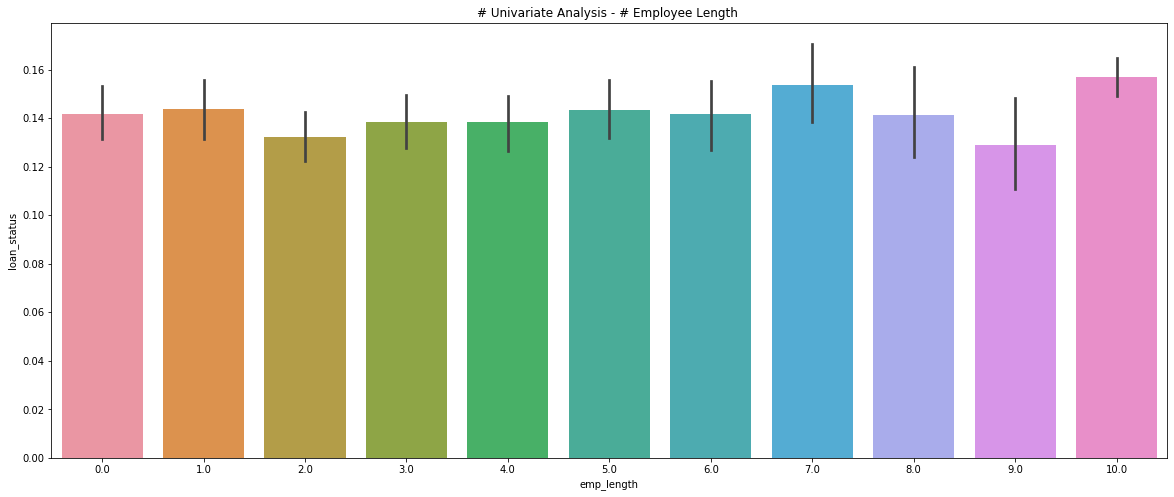

In [29]:
# plotting default loan against # Employee Length
plt.figure(figsize=(20,8))
plt.title('# Univariate Analysis - # Employee Length ')
sns.barplot(x = 'emp_length', y ='loan_status', data=loan)
plt.show()

# Inference: not much differentiator but 10+ years of exp. people are more likely to dafault.

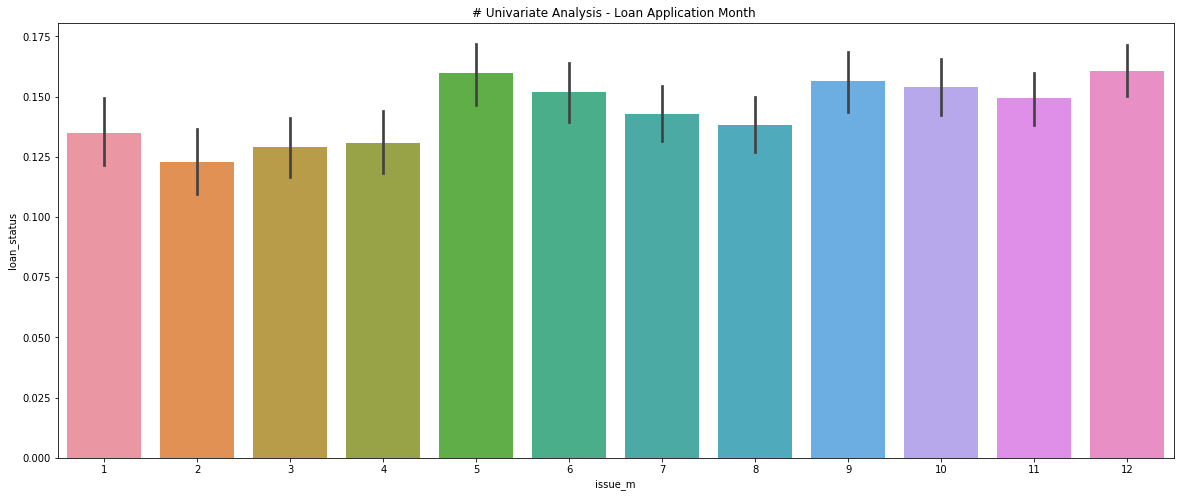

In [30]:
# plotting default loan against Month (to see if loan applied in a month has any pattern)
plt.figure(figsize=(20,8))
plt.title('# Univariate Analysis - Loan Application Month ')
sns.barplot(x = 'issue_m', y ='loan_status', data=loan)
plt.show()

# Inference: No real pattern 

### ___Note:___ 
There are many continuous variable which will have an impact on the loan status. It's not easy to plot them and analyse the result. We will bin the value and look for some pattern.

In [31]:
# Analyse the loan amount for defaulter
print(loan['loan_amnt'].describe())

def loan_amount(n):
    if n < 5300:
        return 'low'
    elif n >=5300 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
loan['loan_amnt'] = loan['loan_amnt'].apply(lambda x: loan_amount(x))
print(loan['loan_amnt'].describe())


count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
count      38577
unique         4
top       medium
freq       18488
Name: loan_amnt, dtype: object


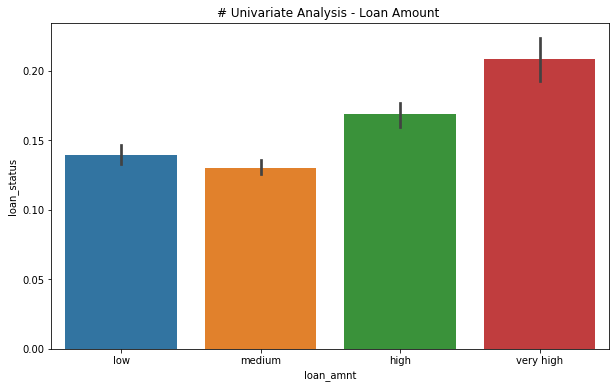

In [32]:
# plotting default loan against loan maount binned value
plt.figure(figsize=(10,6))
plt.title('# Univariate Analysis - Loan Amount ')
sns.barplot(x = 'loan_amnt', y ='loan_status', data=loan)
plt.show()

# Inference: Default rate incrases as loan amount increases 

In [33]:
# Analyse the Interest Rate for defaulter
print(loan['int_rate'].describe())

def int_rate(n):
    if n <= 9:
        return 'low'
    elif n > 10 and n < 15:
        return 'medium'
    elif n >= 15 and n < 20:
        return 'high'
    else:
        return 'very high'
        
loan['int_rate'] = loan['int_rate'].apply(lambda x: int_rate(x))
print(loan['int_rate'].describe())



count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64
count      38577
unique         4
top       medium
freq       18265
Name: int_rate, dtype: object


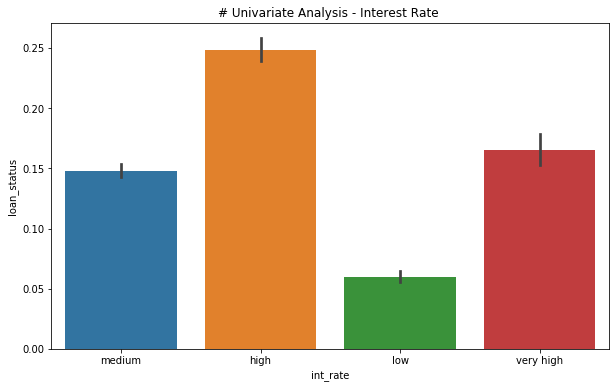

In [34]:
# plotting default loan against Interest Rate binned value
plt.figure(figsize=(10,6))
plt.title('# Univariate Analysis - Interest Rate ')
sns.barplot(x = 'int_rate', y ='loan_status', data=loan)
plt.show()

# Inference: Default rate incrases when interest rate > 15%

In [35]:
# No. of Installement impact on loan defaults

def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
loan['installment'] = loan['installment'].apply(lambda x: installment(x))

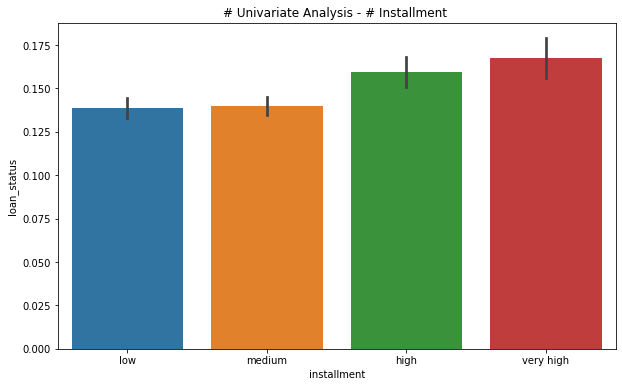

In [36]:
# plotting default loan against No. of Installment
plt.figure(figsize=(10,6))
plt.title('# Univariate Analysis - # Installment ')
sns.barplot(x = 'installment', y ='loan_status', data=loan)
plt.show()

# Inference: More installments shows people inability to clear the loan 

In [37]:
# Analyse the Anual Income for defaulter
print(loan['annual_inc'].describe())
def inc(n):
    if n <= 40000:
        return 'low income'
    elif n > 40000 and n < 85000:
        return 'medium'
    elif n >= 85000 and n < 150000:
        return 'high'
    else:
        return 'very high'
        
loan['annual_inc'] = loan['annual_inc'].apply(lambda x: inc(x))
print(loan['annual_inc'].describe())


count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64
count      38577
unique         4
top       medium
freq       19794
Name: annual_inc, dtype: object


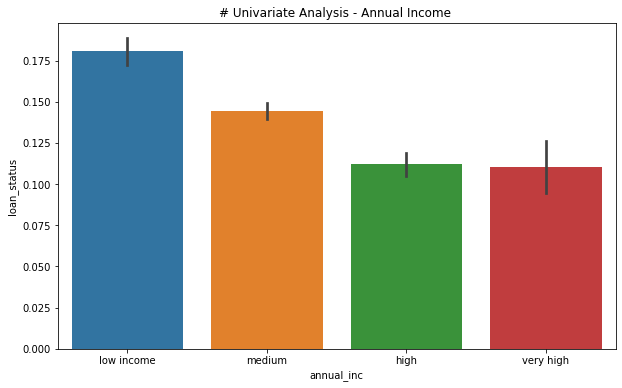

In [38]:
# plotting default loan against No. of Installment
plt.figure(figsize=(10,6))
plt.title('# Univariate Analysis - Annual Income ')
sns.barplot(x = 'annual_inc', y ='loan_status', data=loan)
plt.show()

# Inference: low income group people defualts most compared to high income group

In [39]:
# At last, lets analyse debt to income ratio
print(loan['dti'].describe())

def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

loan['dti'] = loan['dti'].apply(lambda x: dti(x))

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64


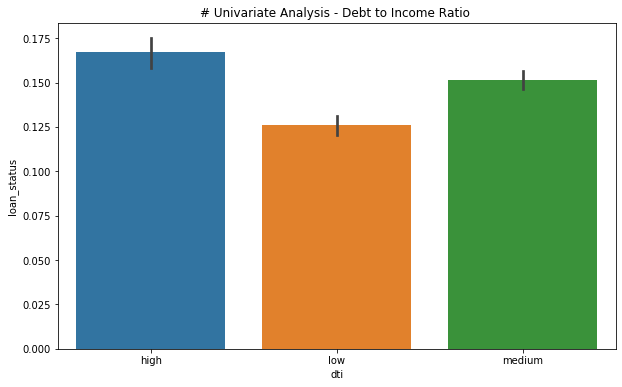

In [40]:
# plotting default loan against debt to income ratio
plt.figure(figsize=(10,6))
plt.title('# Univariate Analysis - Debt to Income Ratio ')
sns.barplot(x = 'dti', y ='loan_status', data=loan)
plt.show()

# Inference: people with high dti defualts most

### 3B. Data Analysis (Univariate and Bi-variate Analysis to identify factors)

 - By now, we have identified all the factors that indicates whether a loan will be defaulted or nor. For the above identified factors, we would now determine how is default rate for some categories.

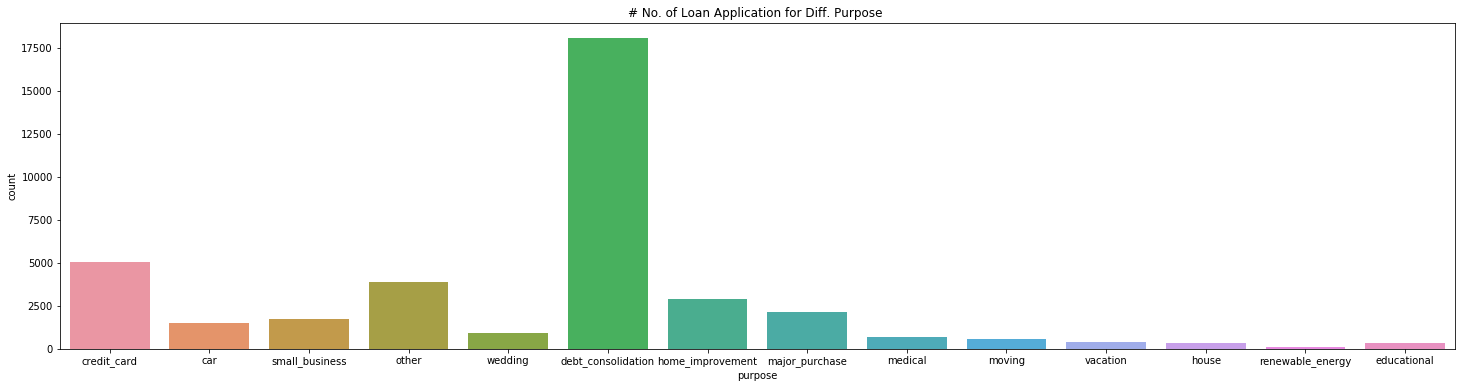

In [41]:
# One of the major factors defaulting the loan was "loan purpose". We saw that loan taken for small business has defaulted 
# the most. 

# Plots the loan counts for purpose

plt.figure(figsize=(25, 6))
plt.title('# No. of Loan Application for Diff. Purpose ')
sns.countplot(x='purpose', data=loan)
plt.show()

In [42]:
# Most of the loan taken is for debt_consolidation, credit card, other, and home_improvement
# Filter the loan df with above loan types

loan = loan[(loan.purpose == 'debt_consolidation') |
            (loan.purpose == 'credit_card') |
            (loan.purpose == 'other') |
            (loan.purpose == 'home_improvement')] 
loan['purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
Name: purpose, dtype: int64

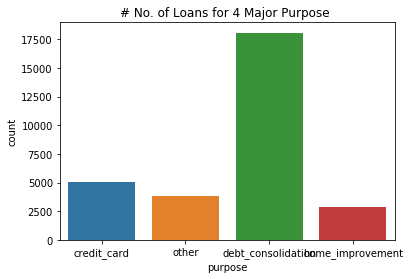

In [43]:
# plotting number of loans by purpose 
sns.countplot(x='purpose', data = loan)
plt.title('# No. of Loans for 4 Major Purpose ')
plt.show()

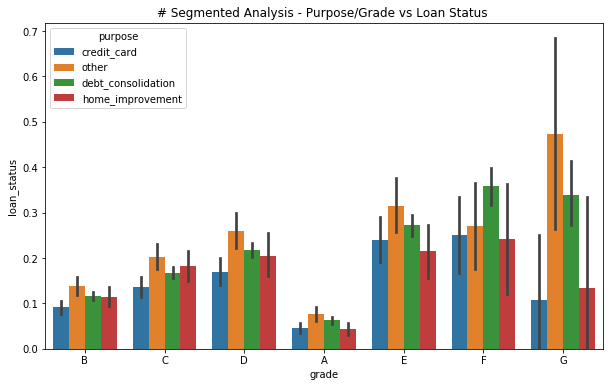

In [54]:
# Plotting these loan pupose against other identified attributes for loan default

# These 4 purpose aginst loan grade
plt.figure(figsize=(10, 6))
plt.title('# Segmented Analysis - Purpose/Grade vs Loan Status ')
sns.barplot(x='grade', y='loan_status', hue='purpose', data=loan)
plt.show()

# Inference:The default rate of the Loan increases significantly for category 'Other' as grade decreases from A to G

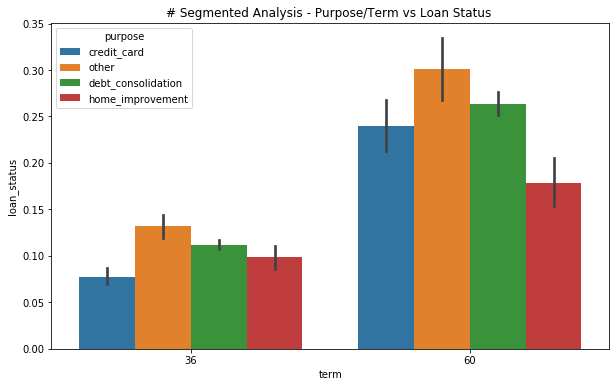

In [45]:
# These 4 purpose aginst loan Loan Term
plt.figure(figsize=(10, 6))
plt.title('# Segmented Analysis - Purpose/Term vs Loan Status ')
sns.barplot(x='term', y='loan_status', hue='purpose', data=loan)
plt.show()

# Inference:The default rate of the Loan increases significantly for ALL4 pupose for loan term 60 months

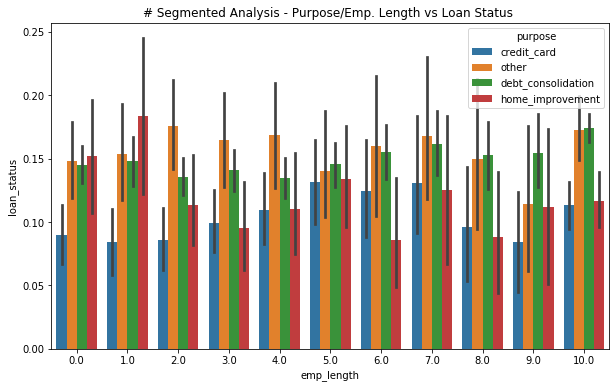

In [46]:
# These 4 purpose aginst Employee Length
plt.figure(figsize=(10, 6))
plt.title('# Segmented Analysis - Purpose/Emp. Length vs Loan Status ')
sns.barplot(x='emp_length', y='loan_status', hue='purpose', data=loan)
plt.show()

# Inference: We have seen that employee with 10+ years of exp. default the most. However, loan taken for "home improvement"
# is defaulted most by employee with 0-1 year of exp.

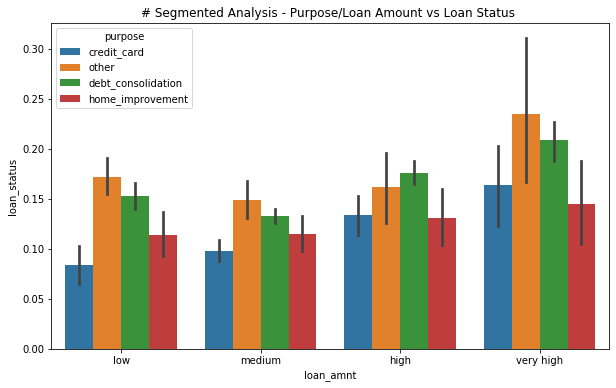

In [47]:
# These 4 purpose aginst Loan Amount
plt.figure(figsize=(10, 6))
plt.title('# Segmented Analysis - Purpose/Loan Amount vs Loan Status ')
sns.barplot(x='loan_amnt', y='loan_status', hue='purpose', data=loan)
plt.show()

# Inference: As the loan amount incrases, default rate increases.Moreover, deafult rate for loan taken for credit 
# card purpose increases significantly with loan amount.

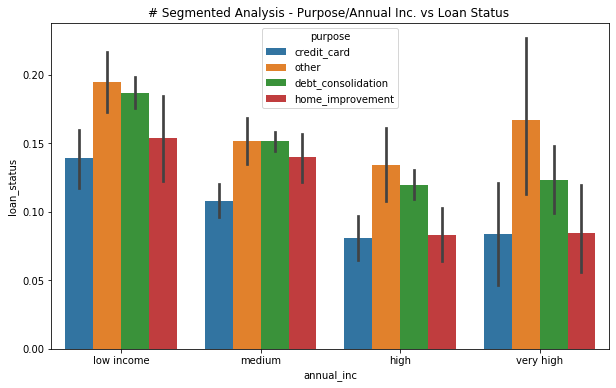

In [48]:
# These 4 purpose aginst Annulka income
plt.figure(figsize=(10, 6))
plt.title('# Segmented Analysis - Purpose/Annual Inc. vs Loan Status ')
sns.barplot(x='annual_inc', y='loan_status', hue='purpose', data=loan)
plt.show()

# Inference: High deafult rate can be observed for loan purpose 'other' and 'debt_consolidation' even in low income
# group people.

In [49]:
# This completes our analysis. For recommendations, please see the pdf file uploaded with this notebook.